<a href="https://colab.research.google.com/github/vivek201102/ML-Labs/blob/master/Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader,TensorDataset
import tensorflow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
mnist = MNIST(root='data/', train=True, download=True)

In [3]:
features_train = mnist.data.float()
targets_train = mnist.targets.long()
features_train /= 255
features_train = features_train.view(-1, 784)

In [4]:
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [5]:
train_set = TensorDataset(features_train, targets_train)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
features_train = torch.tensor(features_train, requires_grad=True)
targets_train = torch.tensor(targets_train)

<ipython-input-5-eb29c107d267>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_train = torch.tensor(features_train, requires_grad=True)
<ipython-input-5-eb29c107d267>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets_train = torch.tensor(targets_train)


In [6]:
mnist_test = MNIST(root='data/', train=False, download=True)
features_test = mnist_test.data.float()
targets_test = mnist_test.targets.long()
features_test /= 255
features_test = features_test.view(-1, 784)

In [7]:
test_set = TensorDataset(features_test, targets_test)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

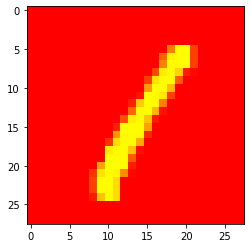

In [8]:
plt.imshow(mnist.data[3], cmap='autumn')
plt.show()

In [9]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 100
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
num_epochs = 5
count=0

# Define empty lists to store loss, iteration and accuracy values
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Convert input and labels to Variables
        train = (images.view(-1, 28*28))
        labels = (labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = criterion(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        # Count iterations
        count += 1

        # Calculate accuracy every 50 iterations
        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = (images.view(-1, 28*28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += labels.size(0)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # Store loss and iteration values
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        # Print loss and accuracy every 500 iterations
        if count % 500 == 0:
            print('Iteration: {} Loss: {:.4f} Accuracy: {:.2f} %'.
                  format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.6300 Accuracy: 86.91 %
Iteration: 1000 Loss: 0.5344 Accuracy: 89.46 %
Iteration: 1500 Loss: 0.4035 Accuracy: 90.38 %
Iteration: 2000 Loss: 0.2331 Accuracy: 90.93 %
Iteration: 2500 Loss: 0.3536 Accuracy: 91.72 %
Iteration: 3000 Loss: 0.1998 Accuracy: 92.08 %


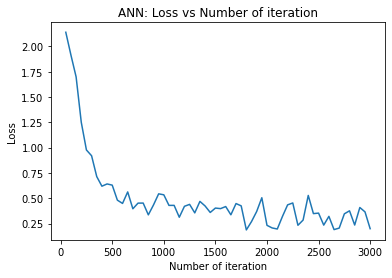

In [11]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

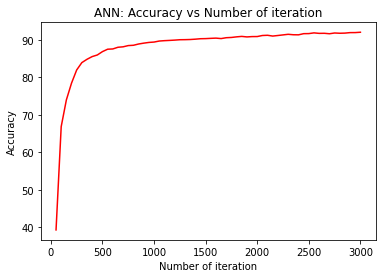

In [12]:
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()